In [1]:
get_ipython().magic(u'run visualizations.ipynb')
import sys
from hits import CyDetHits, CTHHits, CDCHits

from memory_profiler import memory_usage
from collections import Counter
sys.path.insert(0, '../modules')

Populating the interactive namespace from numpy and matplotlib


# Import Data

In [2]:
file_base = "/vols/comet00/users/elg112/ICEDUST"\
            "/local_storage/SimDetectorResponse_tree"\
            "/test_signal_sample/100k_"
data_file = file_base + "cth_mc_hits.root"

In [3]:
from root_numpy import root2array

ice_sample = root2array(data_file, treename="COMETEventsSummary")

In [4]:
for name in ice_sample.dtype.names:
    print name

CTHHit.fModule
CTHHit.fCounter
CTHHit.fIsSc
CTHHit.fIsLG
CTHHit.fIsSig
CTHHit.fNContrib
CTHHit.fMCPos.fP.fX
CTHHit.fMCPos.fP.fY
CTHHit.fMCPos.fP.fZ
CTHHit.fMCPos.fE
CTHHit.fCharge
CTHHit.fChannel
CTHHit.fEventNumber
CTHHit.fHitNumber


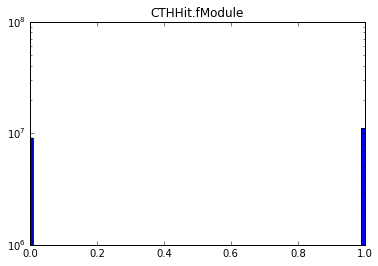

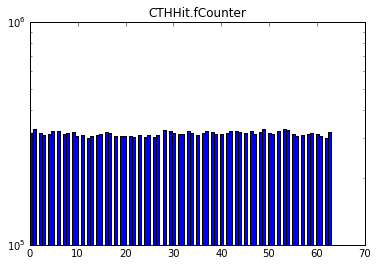

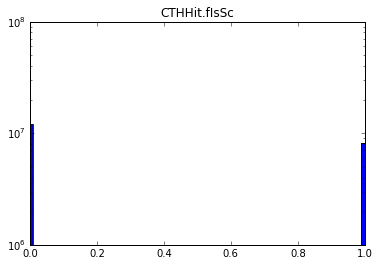

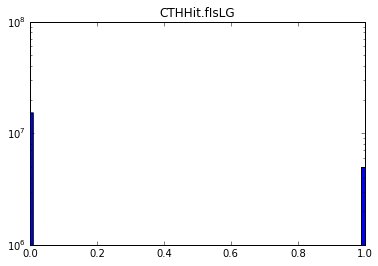

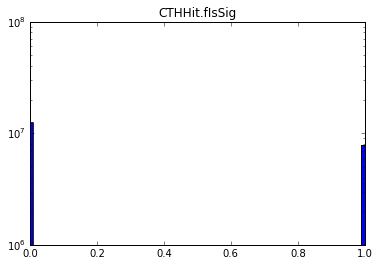

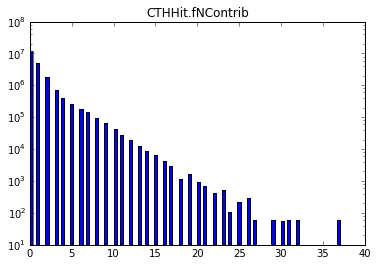

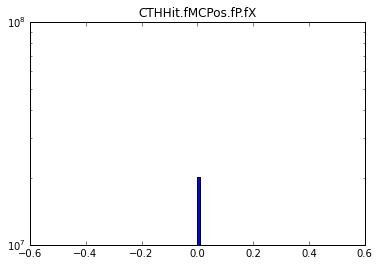

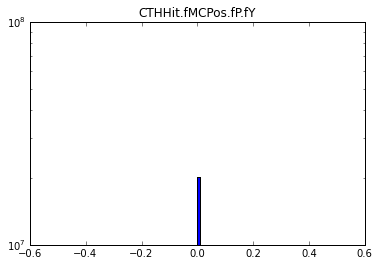

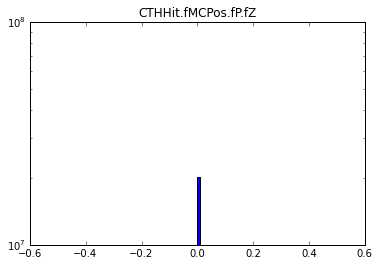

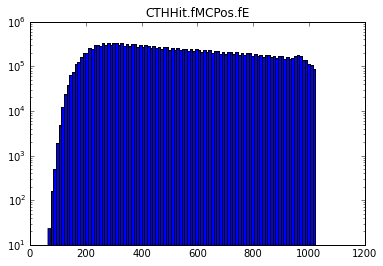

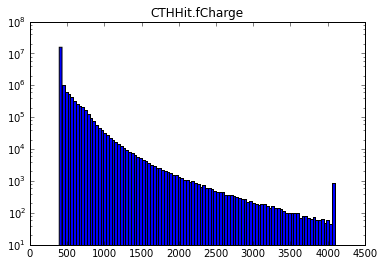

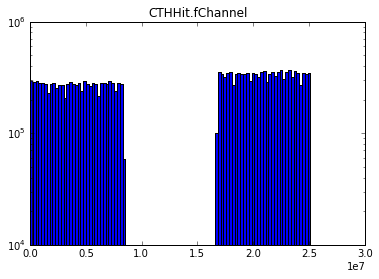

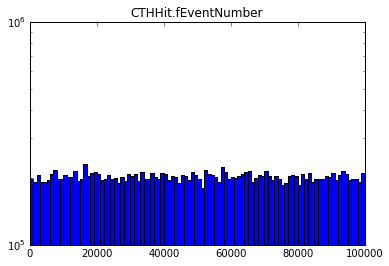

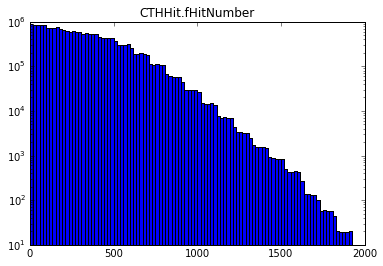

In [5]:
for name in ice_sample.dtype.names:
    plt.title(name)
    plt.hist(ice_sample[name], bins=100, log=True)
    show()

In [6]:
del ice_sample

In [7]:
import hits

In [8]:
reload(hits)

<module 'hits' from '../modules/hits.pyc'>

In [9]:
from hits import FlatHits

In [10]:
ice_flat = FlatHits(path=data_file, 
                    tree="COMETEventsSummary", 
                    prefix="CTHHit.f", 
                    key_name="EventNumber",
                    hit_type_name="MCPos.fP.fX",
                    signal_coding=[0],
                    branches=["Charge", 
                              "Channel", 
                              "HitNumber", 
                              "MCPos.fE",
                              "IsSc",
                              "IsLG",
                              "IsSig",
                              "Counter",
                              "Module"],
                    use_evt_idx=True)

CTHHit.fCharge
CTHHit.fChannel
CTHHit.fHitNumber
CTHHit.fMCPos.fE
CTHHit.fIsSc
CTHHit.fIsLG
CTHHit.fIsSig
CTHHit.fCounter
CTHHit.fModule
CTHHit.fMCPos.fP.fX
CTHHit.fEventNumber
CTHHit.fhits_index
CTHHit.fevent_index


In [11]:
print ice_flat.all_branches
print ice_flat.n_events
print ice_flat.n_hits
print ice_flat.event_to_n_hits
print ice_flat.hits_to_events
print ice_flat.event_to_hits

['CTHHit.fCharge', 'CTHHit.fChannel', 'CTHHit.fHitNumber', 'CTHHit.fMCPos.fE', 'CTHHit.fIsSc', 'CTHHit.fIsLG', 'CTHHit.fIsSig', 'CTHHit.fCounter', 'CTHHit.fModule', 'CTHHit.fMCPos.fP.fX', 'CTHHit.fEventNumber', 'CTHHit.fhits_index', 'CTHHit.fevent_index']
43087
20179210
[709 303 101 ..., 508 608 305]
[    0     0     0 ..., 43086 43086 43086]
[ array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
     

In [12]:
import pandas

In [13]:
iced_df = pandas.DataFrame(ice_flat.data)
iced_df

,CTHHit.fCharge,CTHHit.fChannel,CTHHit.fHitNumber,CTHHit.fMCPos.fE,CTHHit.fIsSc,CTHHit.fIsLG,CTHHit.fIsSig,CTHHit.fCounter,CTHHit.fModule,CTHHit.fMCPos.fP.fX,CTHHit.fEventNumber,CTHHit.fhits_index,CTHHit.fevent_index
0,401,688128,0,236,False,True,False,5,0,0,0,0,0
1,400,688128,1,237,False,True,False,5,0,0,0,1,0
2,400,688128,2,238,False,True,False,5,0,0,0,2,0
3,400,688128,3,239,False,True,False,5,0,0,0,3,0
4,400,688128,4,240,False,True,False,5,0,0,0,4,0
5,400,688128,5,241,False,True,False,5,0,0,0,5,0
6,399,688128,6,242,False,True,False,5,0,0,0,6,0
7,400,688128,7,243,False,True,False,5,0,0,0,7,0
8,399,688128,8,244,False,True,False,5,0,0,0,8,0
9,401,688128,9,245,False,True,False,5,0,0,0,9,0


In [14]:
del iced_df

IsSc [False]
IsLG [ True]
IsSig [False  True]
Counter [5]
Module [0]


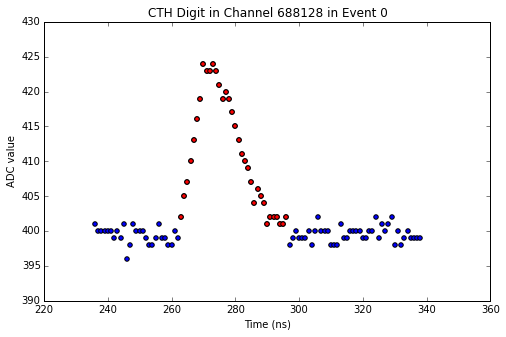

IsSc [ True]
IsLG [False]
IsSig [False  True]
Counter [49]
Module [0]


/home/hep/elg112/software/python/virtual_envs/rep/lib/python2.7/site-packages/ipykernel/__main__.py:24: FutureWarning: elementwise != comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.


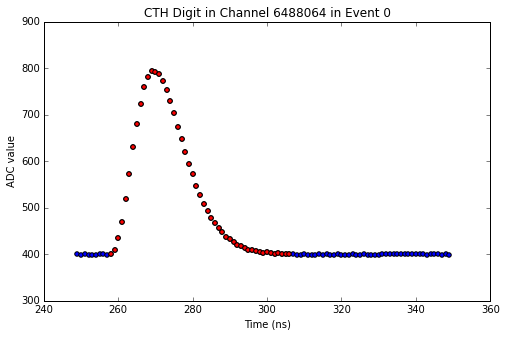

IsSc [ True]
IsLG [False]
IsSig [False  True]
Counter [50]
Module [0]


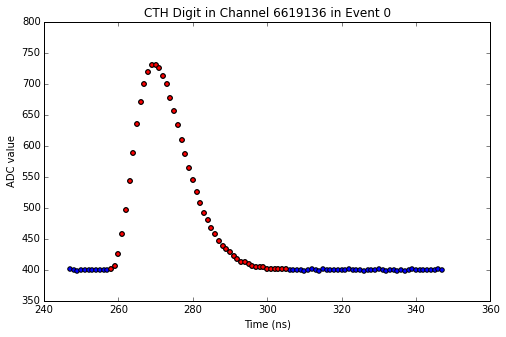

IsSc [False]
IsLG [False]
IsSig [False  True]
Counter [51]
Module [0]


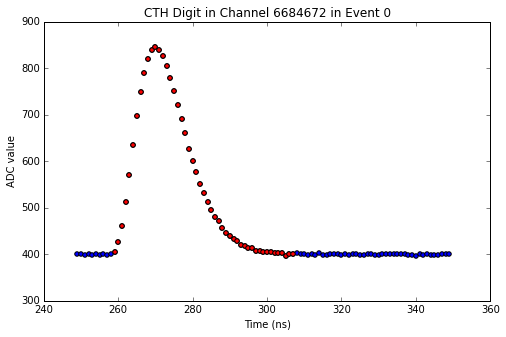

IsSc [ True]
IsLG [False]
IsSig [False  True]
Counter [51]
Module [0]


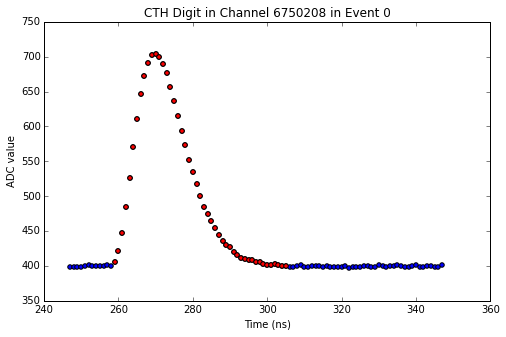

IsSc [False]
IsLG [ True]
IsSig [False  True]
Counter [52]
Module [0]


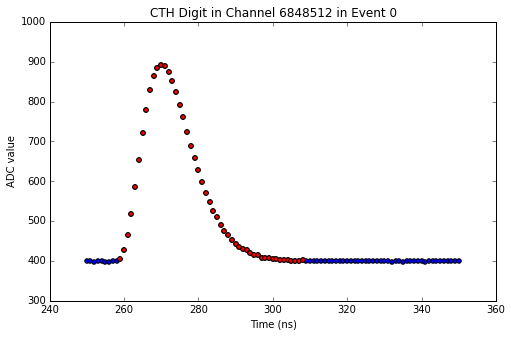

IsSc [False]
IsLG [ True]
IsSig [False  True]
Counter [53]
Module [0]


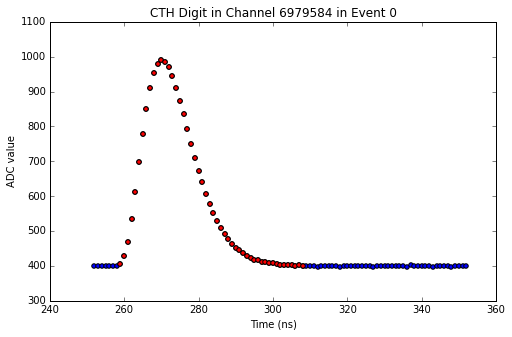

IsSc [False]
IsLG [False]
IsSig [False  True]
Counter [5]
Module [0]


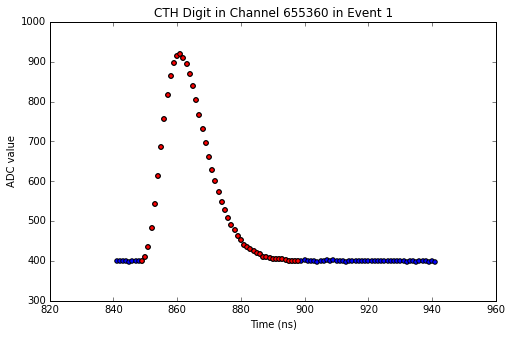

IsSc [False]
IsLG [False]
IsSig [False  True]
Counter [6]
Module [0]


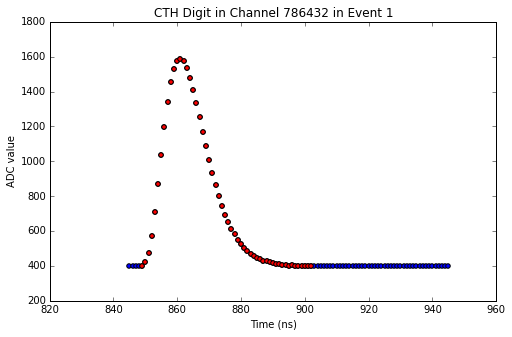

IsSc [ True]
IsLG [False]
IsSig [False  True]
Counter [8]
Module [0]


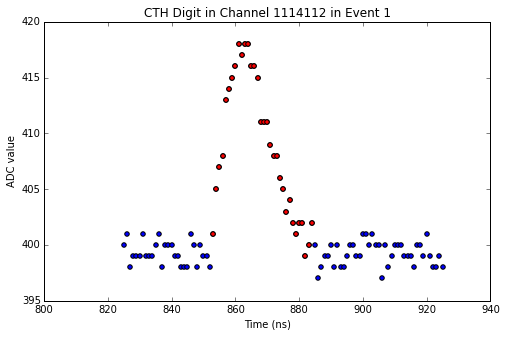

IsSc [False]
IsLG [ True]
IsSig [False  True]
Counter [15]
Module [0]


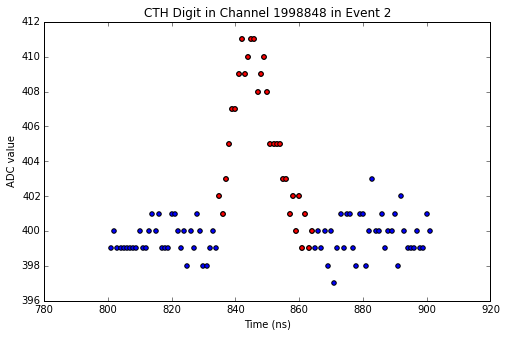

IsSc [False]
IsLG [False]
IsSig [False  True]
Counter [49]
Module [1]


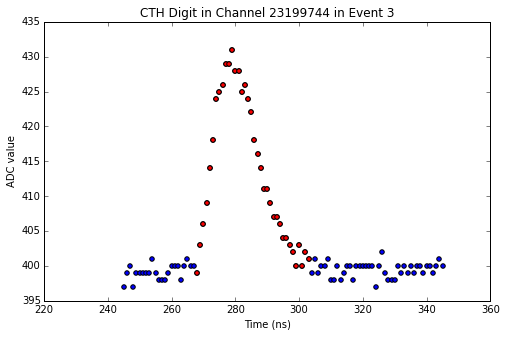

IsSc [False]
IsLG [False]
IsSig [False  True]
Counter [50]
Module [1]


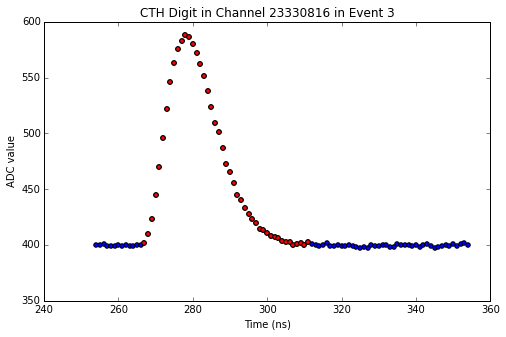

IsSc [False]
IsLG [False]
IsSig [False  True]
Counter [51]
Module [1]


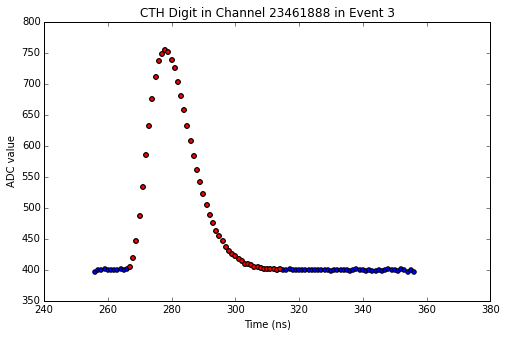

IsSc [ True]
IsLG [False]
IsSig [False  True]
Counter [51]
Module [1]


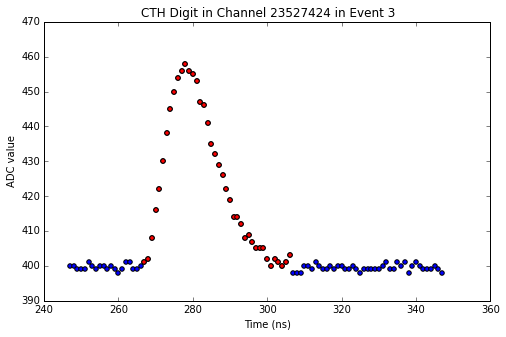

IsSc [False]
IsLG [False]
IsSig [False  True]
Counter [52]
Module [1]


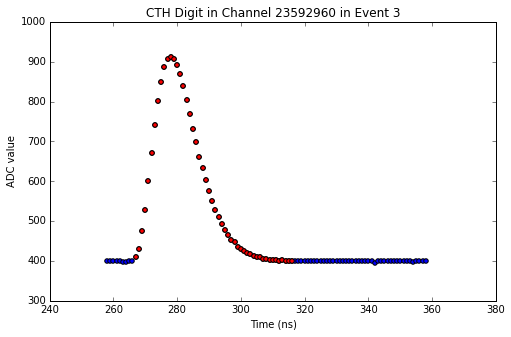

IsSc [ True]
IsLG [False]
IsSig [False  True]
Counter [52]
Module [1]


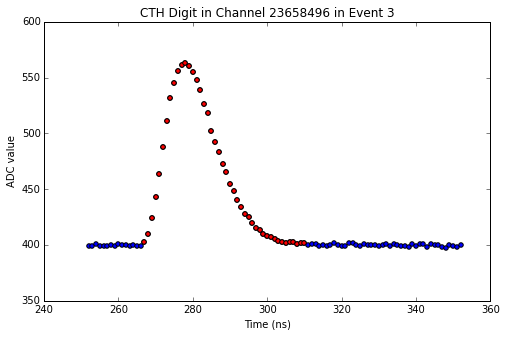

IsSc [ True]
IsLG [False]
IsSig [False  True]
Counter [53]
Module [1]


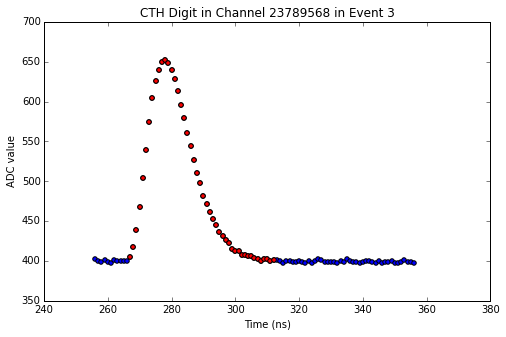

IsSc [False]
IsLG [False]
IsSig [False  True]
Counter [46]
Module [0]


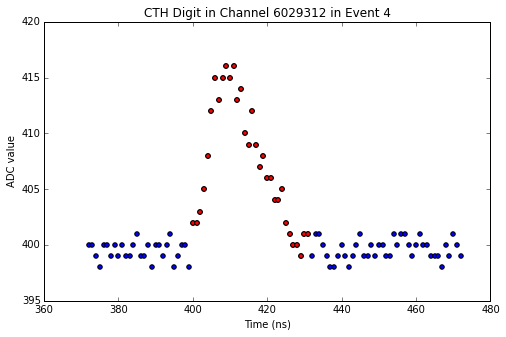

IsSc [False]
IsLG [False]
IsSig [False  True]
Counter [47]
Module [0]


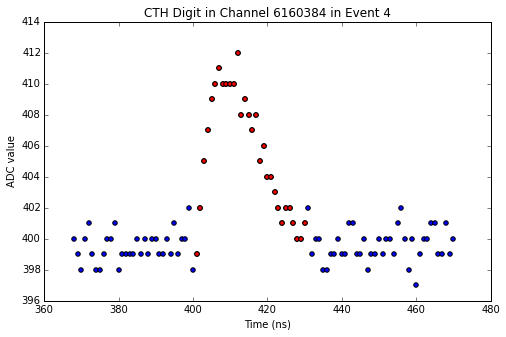

IsSc [False]
IsLG [False]
IsSig [False  True]
Counter [50]
Module [0]


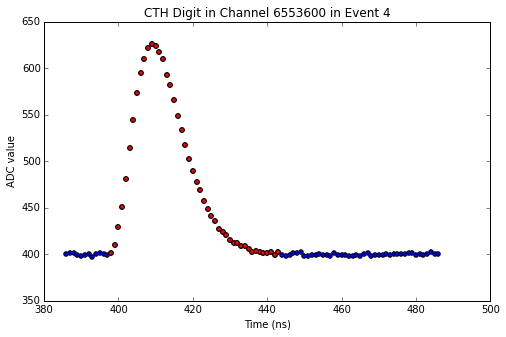

IsSc [ True]
IsLG [False]
IsSig [False  True]
Counter [0]
Module [1]


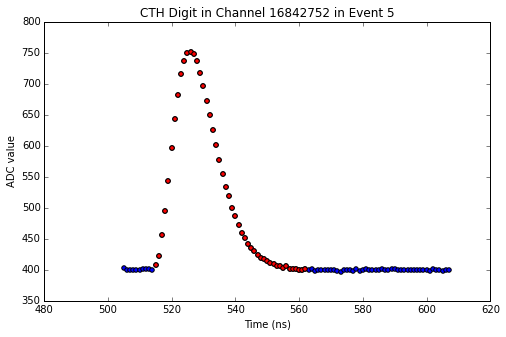

IsSc [ True]
IsLG [False]
IsSig [False  True]
Counter [2]
Module [1]


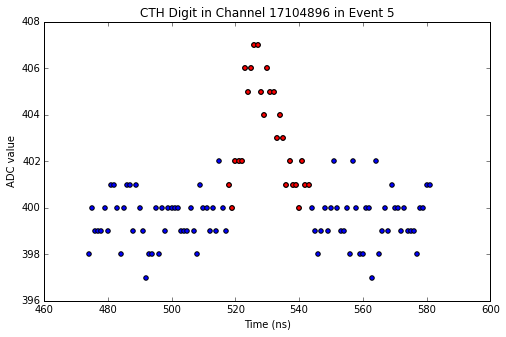

IsSc [ True]
IsLG [False]
IsSig [False  True]
Counter [4]
Module [1]


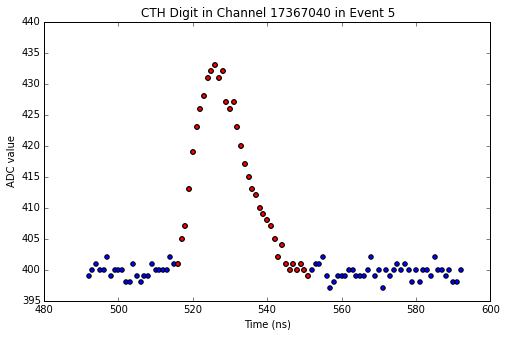

IsSc [False]
IsLG [False]
IsSig [False]
Counter [36]
Module [0]


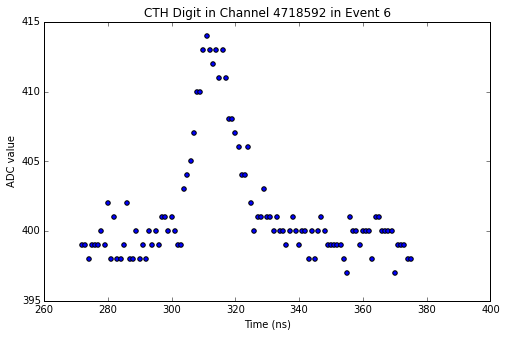

IsSc [False]
IsLG [ True]
IsSig [False]
Counter [49]
Module [0]


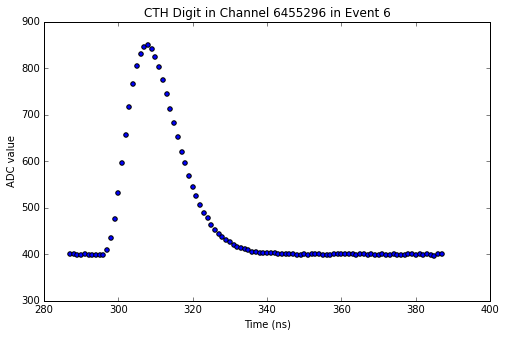

IsSc [ True]
IsLG [ True]
IsSig [False]
Counter [49]
Module [0]


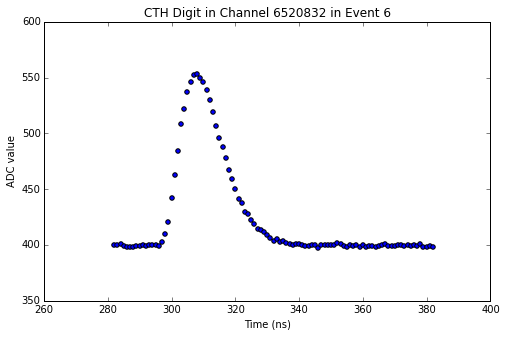

IsSc [False]
IsLG [ True]
IsSig [False]
Counter [50]
Module [0]


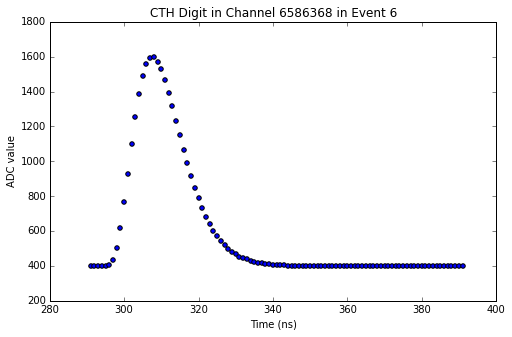

IsSc [ True]
IsLG [ True]
IsSig [False]
Counter [50]
Module [0]


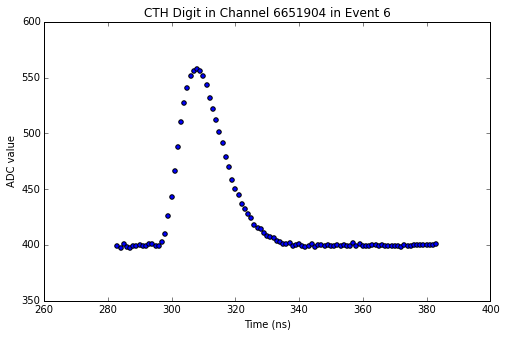

IsSc [ True]
IsLG [ True]
IsSig [False]
Counter [52]
Module [0]


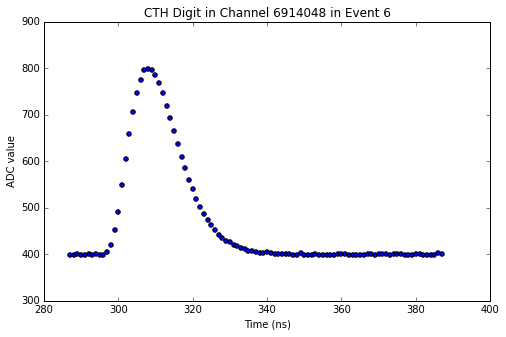

IsSc [False]
IsLG [False]
IsSig [False]
Counter [53]
Module [0]


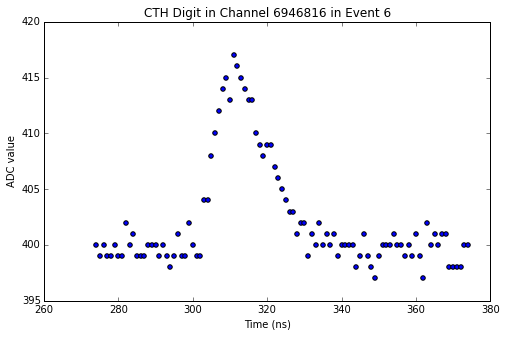

IsSc [False]
IsLG [False]
IsSig [False  True]
Counter [16]
Module [1]


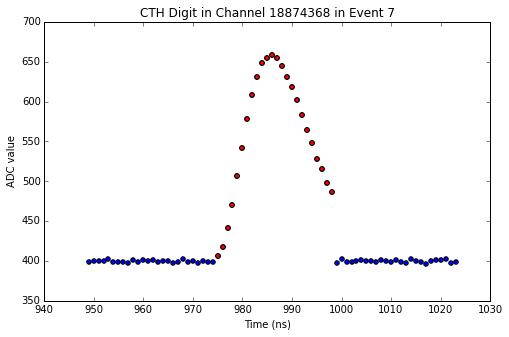

IsSc [False]
IsLG [False]
IsSig [False  True]
Counter [17]
Module [1]


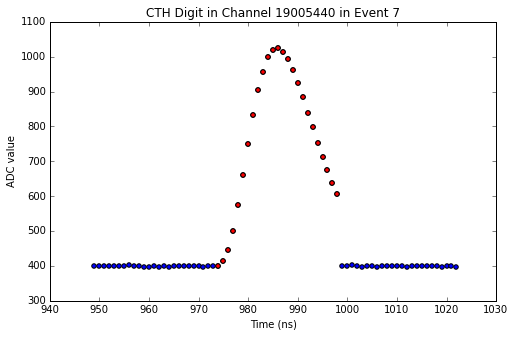

IsSc [ True]
IsLG [False]
IsSig [False  True]
Counter [17]
Module [1]


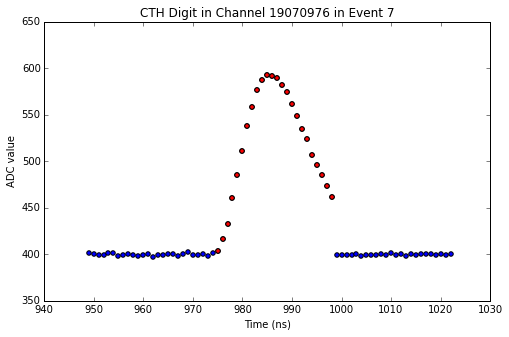

IsSc [ True]
IsLG [False]
IsSig [False  True]
Counter [18]
Module [1]


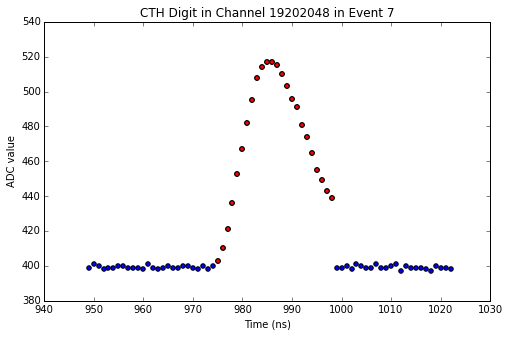

IsSc [False]
IsLG [ True]
IsSig [False  True]
Counter [57]
Module [1]


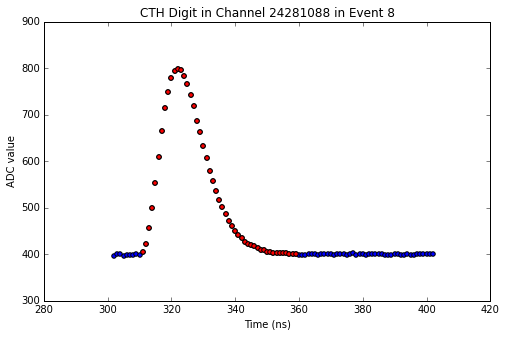

IsSc [False]
IsLG [ True]
IsSig [False  True]
Counter [58]
Module [1]


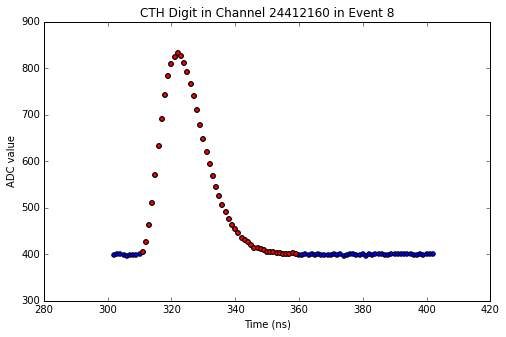

IsSc [ True]
IsLG [ True]
IsSig [False  True]
Counter [58]
Module [1]


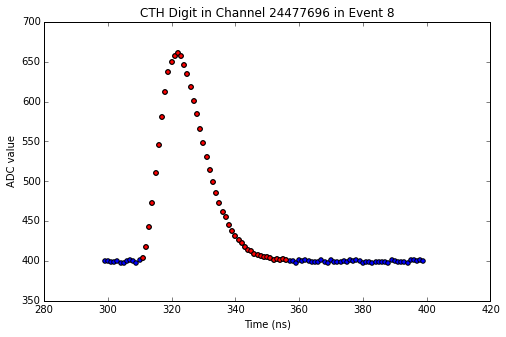

IsSc [False]
IsLG [ True]
IsSig [False  True]
Counter [59]
Module [1]


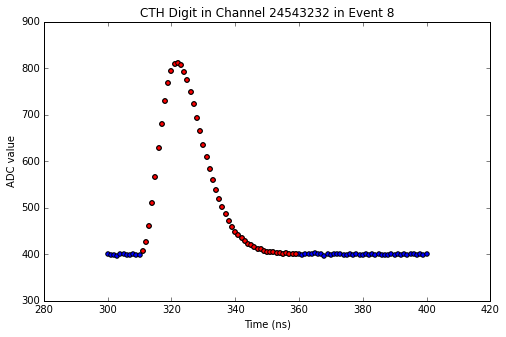

IsSc [ True]
IsLG [ True]
IsSig [False  True]
Counter [59]
Module [1]


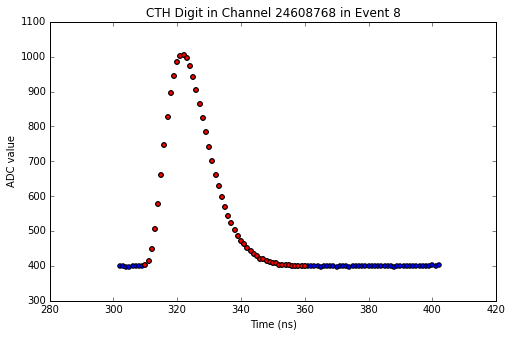

IsSc [ True]
IsLG [ True]
IsSig [False  True]
Counter [60]
Module [1]


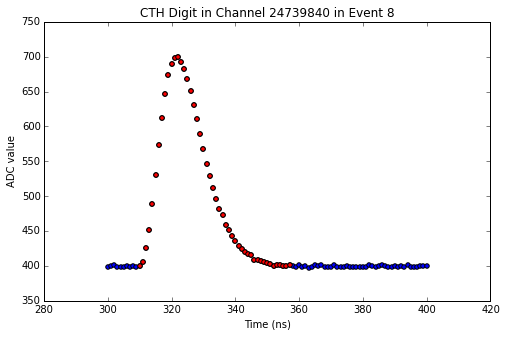

IsSc [False]
IsLG [False]
IsSig [False  True]
Counter [63]
Module [0]


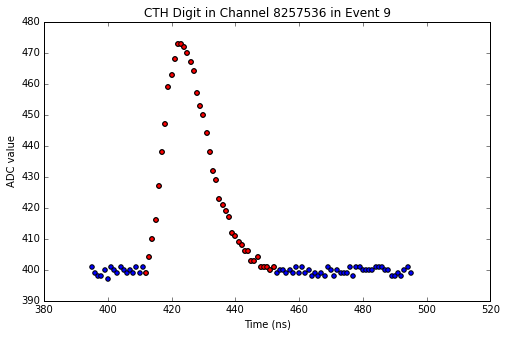

10
43087


In [20]:
# Look at the digits
sig_events = 0
chan_name = "CTHHit.fChannel"
figsize(8,5)
for event in np.unique(ice_flat.hits_to_events)[:10]:
    #print event
    event_hits = ice_flat.get_events(events=event)
    channels = np.unique(event_hits[chan_name])
    sig_event = False
    for chan in channels:
        chan_hits = ice_flat.filter_hits(event_hits, chan_name, values=chan)
        sig_hits = ice_flat.filter_hits(chan_hits, "CTHHit.fIsSig", values=1)
        plt.scatter(chan_hits["CTHHit.fMCPos.fE"],chan_hits["CTHHit.fCharge"])
        plt.scatter(sig_hits["CTHHit.fMCPos.fE"],sig_hits["CTHHit.fCharge"], c='r')
        plt.xlabel("Time (ns)")
        plt.ylabel("ADC value")
        plt.title("CTH Digit in Channel {} in Event {}".format(chan, event))
        print "IsSc {}".format(np.unique(chan_hits["CTHHit.fIsSc"]))
        print "IsLG {}".format(np.unique(chan_hits["CTHHit.fIsLG"]))
        print "IsSig {}".format(np.unique(chan_hits["CTHHit.fIsSig"]))
        print "Counter {}".format(np.unique(chan_hits["CTHHit.fCounter"]))
        print "Module {}".format(np.unique(chan_hits["CTHHit.fModule"]))
        plt.show()
        if sig_hits != 0:
            sig_event = True
    sig_events += sig_event
print sig_events
print ice_flat.n_events

In [16]:
# Look at the digits
chan_name = "CTHHit.fChannel"
max_charge = []
min_time = []
max_time = []
min_peak_time = []

for event in np.unique(ice_flat.hits_to_events)[:]:
    event_hits = ice_flat.get_events(events=event)
    #event_hits = ice_flat.filter_hits(event_hits, "CTHHit.fIsSc", values=[True])
    event_hits = ice_flat.filter_hits(event_hits, "CTHHit.fIsSig", values=[True])
    if len(event_hits) != 0:
        max_charge.append(np.amax(event_hits["CTHHit.fCharge"]))
        min_time.append(np.amin(event_hits["CTHHit.fMCPos.fE"]))
        max_time.append(np.amax(event_hits["CTHHit.fMCPos.fE"]))
        t_hit = 1000000000
        for channel in np.unique(event_hits["CTHHit.fChannel"]):
            chan_hits = ice_flat.filter_hits(event_hits, "CTHHit.fChannel", values=channel)
            t_hit_here = ice_flat.filter_hits(chan_hits, "CTHHit.fCharge", 
                                             values=np.amax(chan_hits["CTHHit.fCharge"]))["CTHHit.fMCPos.fE"]
            t_hit_here = np.amin(t_hit_here)
            t_hit = min(t_hit, t_hit_here)
        min_peak_time.append(t_hit)

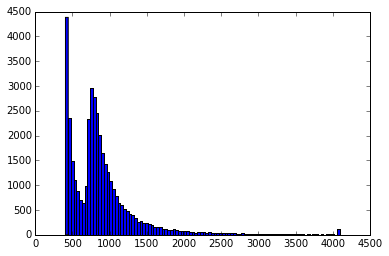

In [17]:
plt.hist(max_charge, bins=100)
plt.show()

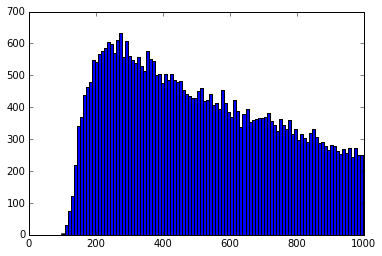

In [18]:
plt.hist(min_time, bins=100)
plt.show()

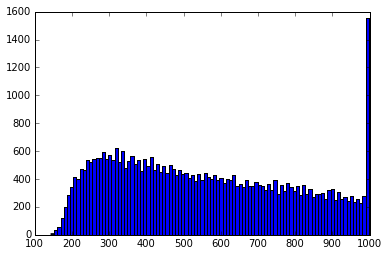

In [19]:
plt.hist(max_time, bins=100)
plt.show()

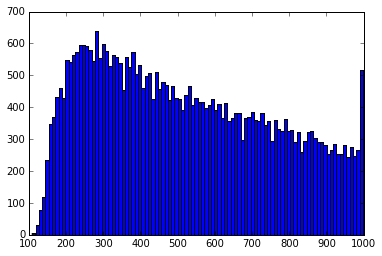

In [20]:
plt.hist(min_peak_time, bins=100)
plt.show()